In [1]:
!pip install gensim


In [7]:
import gensim

import pandas as pd

import gensim.downloader

Part 1: Word Embeddings

In [8]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['sadness']

# Getting the most similar words

print(model.most_similar('sadness'))

# Getting the similarity between two words

print(model.similarity('sadness', 'grief'))


[('sorrow', 0.9304218292236328), ('grief', 0.8693121671676636), ('anguish', 0.8477922081947327), ('despair', 0.7822050452232361), ('astonishment', 0.7691803574562073), ('dismay', 0.768113374710083), ('bewilderment', 0.759986162185669), ('regret', 0.7546784281730652), ('disgust', 0.7455825805664062), ('disappointment', 0.736922025680542)]
0.86931205


Part 1a

In [32]:

#find the most similar words to a word of your choice. 
print(model.most_similar('sorrow'))
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

[('sadness', 0.930421769618988), ('grief', 0.873085081577301), ('anguish', 0.8289809823036194), ('regret', 0.7620853781700134), ('sympathy', 0.7400789856910706), ('despair', 0.7344743609428406), ('remorse', 0.7244885563850403), ('condolences', 0.7135780453681946), ('dismay', 0.7047054171562195), ('gratitude', 0.7045140862464905)]


In [9]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [10]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [18]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#Define the "wealth/status" dimension by subtracting 'poor' from 'rich'
wealth = model["rich"] - model["poor"]

#Add the wealth/status dimension to different words
wealthy_profession = model["teacher"] + wealth
wealthy_location = model["city"] + wealth
wealthy_vehicle = model["car"] + wealth

#Check the most similar words to each
print("Most similar to 'wealthy teacher':", model.most_similar(wealthy_profession))
print("Most similar to 'wealthy city':", model.most_similar(wealthy_location))
print("Most similar to 'wealthy car':", model.most_similar(wealthy_vehicle))

#does this show any bias or assumptions in the data? 
wealth=model["rich"]-model["poor"]

print(model.most_similar(wealth))
print(model.most_similar(-wealth))

model.most_similar(model["teacher"]+wealth)

#Discuss with your group and share most interesting dimension in the document
#Yes, this example can reveal biases or assumptions in the data about wealth and social status. By adding a "wealth" vector (isolated by subtracting "poor" from "rich") to words like "teacher," "city," or "car," the model may associate these terms with wealth-related concepts, potentially showing biases about socioeconomic status. For exmaple: Adding the "wealth" vector to "teacher" result in associations that lean toward higher-paying or prestigious occupations, suggesting assumptions about wealthier professions. If "teacher" returns words like "rich", "author", "musician"

Most similar to 'wealthy teacher': [('teacher', 0.6680964827537537), ('rich', 0.5727817416191101), ('writer', 0.5442889332771301), ('student', 0.5289105176925659), ('educator', 0.5216258764266968), ('poet', 0.5188854932785034), ('friend', 0.517753541469574), ('taught', 0.5149722099304199), ('musician', 0.5136236548423767), ('author', 0.5125022530555725)]
Most similar to 'wealthy city': [('city', 0.7578812837600708), ('town', 0.6408730149269104), ('rich', 0.629729151725769), ('southern', 0.6000362038612366), ('northern', 0.5800671577453613), ('cities', 0.579162061214447), ('where', 0.571696937084198), ('capital', 0.565071702003479), ('downtown', 0.5610560178756714), ('located', 0.5568658113479614)]
Most similar to 'wealthy car': [('car', 0.7313539385795593), ('truck', 0.6439815163612366), ('vehicle', 0.6040875911712646), ('cars', 0.5820707678794861), ('jeep', 0.5790131688117981), ('suv', 0.5755172371864319), ('minivan', 0.5669410824775696), ('mercedes', 0.5479638576507568), ('parked', 0

[('teacher', 0.6680964827537537),
 ('rich', 0.5727817416191101),
 ('writer', 0.5442889332771301),
 ('student', 0.5289105176925659),
 ('educator', 0.5216258764266968),
 ('poet', 0.5188854932785034),
 ('friend', 0.517753541469574),
 ('taught', 0.5149722099304199),
 ('musician', 0.5136236548423767),
 ('author', 0.5125022530555725)]

Part 2: Visualization and Embeddings in Space

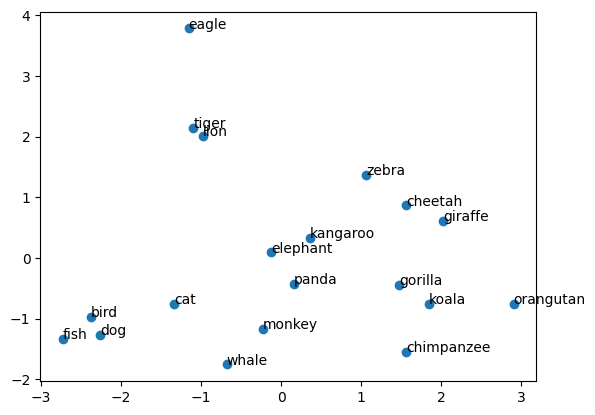

In [33]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

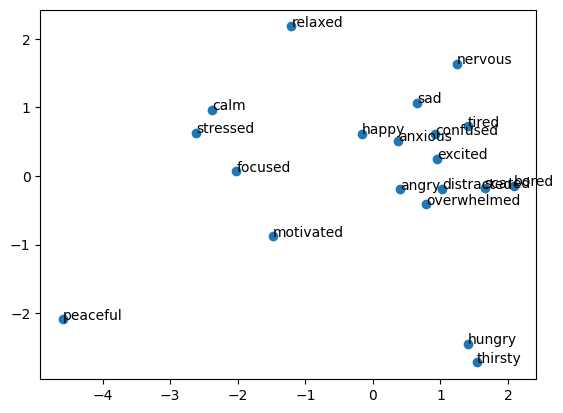

In [40]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words=["happy","sad","angry", "excited", "tired", "hungry", "thirsty", "bored", "scared", "nervous", "anxious", "relaxed", "calm", "peaceful", "stressed", "overwhelmed", "confused", "focused", "distracted", "motivated"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

#After seeing result we are surprised or confused let say. We were wondering on what bases it spreaded because it seems very random

[==================================================] 100.0% 387.1/387.1MB downloaded


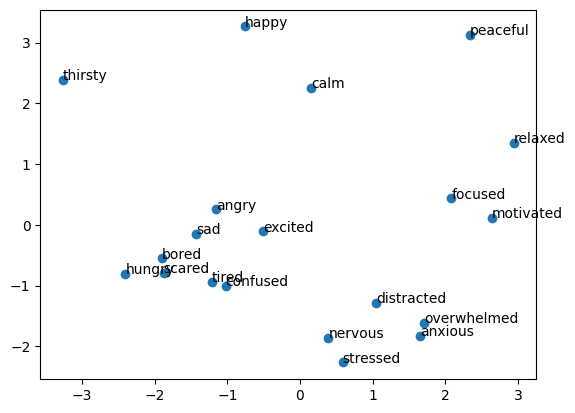

In [41]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

#Extract embeddings for the same set of words using the Twitter model
X_twitter = [twitter_model[word] for word in words if word in twitter_model]

#Perform PCA to reduce to 2 dimensions
X_twitter_pca = pca.fit_transform(X_twitter)

#Plot the 2D projection of the Twitter embeddings
plt.scatter(X_twitter_pca[:, 0], X_twitter_pca[:, 1])

for i, word in enumerate([word for word in words if word in twitter_model]):
    plt.annotate(word, (X_twitter_pca[i, 0], X_twitter_pca[i, 1]))

plt.show()

In [42]:
# The two graphs show noticeable shifts in the positioning of emotions, indicating changes in the embedding space. Words like "peaceful," "focused," and "relaxed" have moved to different quadrants, suggesting that the underlying relationships between emotions in the embedding space vary. This may be due to differences in the training data, which could emphasize different contextual associations. Such variability reflects how the model's understanding of word relationships is shaped by the specific contexts in the data, impacting how words cluster in dimensionality reduction.

Part 3: Embedding reddit posts

In [48]:
import pandas as pd

In [49]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [50]:
#using the code from project 1, clean the text and create a bag of words representation of the text
!python -m spacy download en_core_web_sm 

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------  12.6/12.8 MB 60.4 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 44.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [53]:
import spacy
languagemodel = spacy.load("en_core_web_sm")

def lemmatize(text):
    doc = languagemodel(text)  # Use the correct variable name here
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]  # Use .lemma_ instead of .lemma for the lemma
    return ' '.join(tokens)

def clean(text):
    # Remove newline and extra space characters
    text = ' '.join(text.split())
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Assuming 'data' is a DataFrame with a 'text' column
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [54]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])

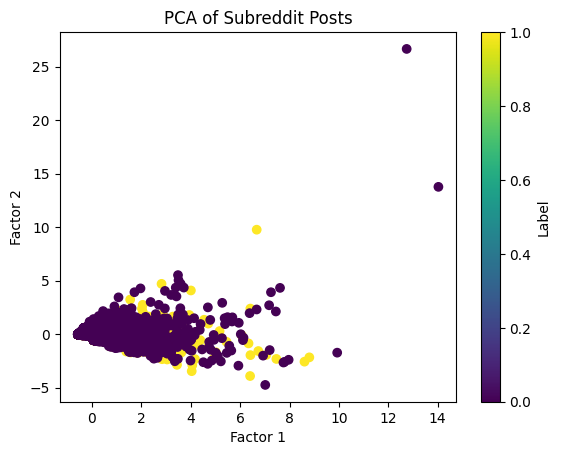

In [55]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
from sklearn.decomposition import PCA

#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

#is there a clear separation between the two columns?
import matplotlib.pyplot as plt

#Calculate the PCA of the bag of words representation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bag_of_words.toarray())

#Plot the PCA with color-coded labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='viridis')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('PCA of Subreddit Posts')
plt.colorbar(label='Label')
plt.show()

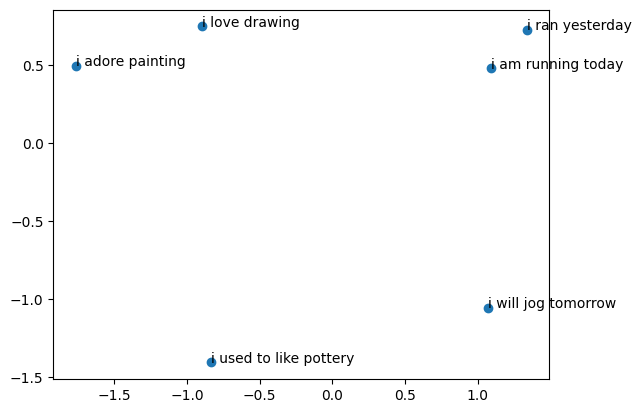

In [56]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

c:\Users\leeti\anaconda3\envs\is310\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\leeti\anaconda3\envs\is310\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\leeti\AppData\Local\Temp\ipykernel_20004\1378233976.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], cmap='viridis')


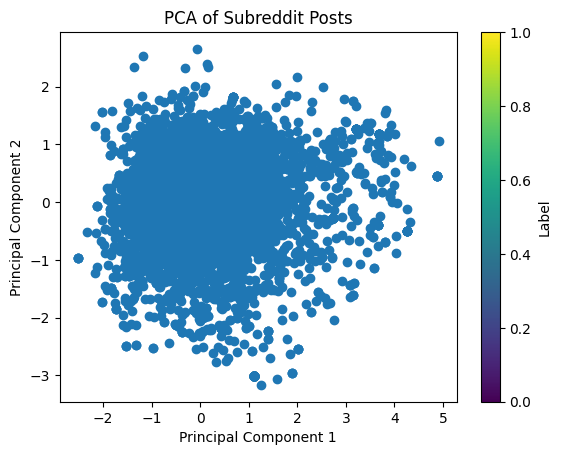

In [57]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

#Calculate average embeddings for each post in the dataset
average_embeddings = [avg_embedding(post, model) for post in data['lemmatized_text']]

#Filter to ensure all embeddings are of the expected shape
valid_embeddings = [embedding for embedding in average_embeddings if embedding.shape == (100,)]

#Convert the list of valid embeddings into a NumPy array
embedding_array = np.array(valid_embeddings)

#Perform PCA on the valid embeddings
pca_model = PCA(n_components=2)
reduced_embeddings = pca_model.fit_transform(embedding_array)

#Plotting the PCA results
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Subreddit Posts')
plt.colorbar(label='Label')
plt.show()


Part 4: HuggingFace and BERT

In [10]:
!pip install transformers
!pip install torch

In [11]:
#Please wait until after next week to start
# Use a pipeline as a high-level helper
%pip install ipywidgets

from transformers import pipeline

#download bert model
%pip install torch
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [11]:
import pandas as pd
from transformers import pipeline

# Load both datasets
uiuc_data = pd.read_csv('uiuc.csv')
umich_data = pd.read_csv('umich.csv')

# Combine the datasets into one DataFrame
data = pd.concat([uiuc_data, umich_data], ignore_index=True)

# Initialize the sentiment analysis pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Define the classify sentiment function
def classify_sentiment(text):
    try:
        return pipe(text)[0]['label']
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return None

# Apply the sentiment classification
data['sentiment'] = data['text'].apply(classify_sentiment)

# Report the most common sentiment label
most_common_sentiment = data['sentiment'].value_counts().idxmax()
print(f"The most common sentiment label is: {most_common_sentiment}")


Token indices sequence length is longer than the specified maximum sequence length for this model (299 > 128). Running this sequence through the model will result in indexing errors


Error processing text: Basically you just need to get to ORD (and fly to Newark from there). You’ve got three options for that

First, you can take a bus. Peoria Charter is a good option because they have service to ORD from three stops in CU every two hours or so (and more on busy travel days like school breaks). It’ll take around 3.5-4 hours to get to ORD and tickets around $40-$50 each way

You could also take the train, but it’s a bit more complicated, as Amtrak’s routes from Champaign to Chicago will end up you at Union Station in downtown. From there you’ll need to take the CTA blue line to the airport. It’s around a 2.5-3 hour train ride plus about 45 minutes on the CTA line. Amtrak tickets are much cheaper though, as they only cost around $15 if you book in advance (plus another $5 for the CTA ticket to the airport). You also have more limited timing options, as there are only 3 trains per day from Champaign to Chicago

Lastly, you could fly. There are two flights a day from Ch

In [12]:
#look at ten sample posts and labels; do you agree with all of them? 
sample_posts = data[['text', 'sentiment']].sample(10)
print("Sample posts and their sentiment labels:")
print(sample_posts)

Sample posts and their sentiment labels:
                                                    text sentiment
4098                  AS A BODYBUILDER THANK YOU SO MUCH       POS
1674                                           [deleted]       NEU
7194   > Someone is trying to be incredibly patient w...       NEG
3974   I used to hike in Tatras a lot, like twice to ...       NEU
3485   I'm selling one if you're still interested (Ic...       NEU
4301   Probably - but assumptions are not great when ...       NEU
3432   This is equivalent to saying that a sponge you...       NEU
10950  Im going to be so real, the price of parking +...       NEU
8954   You can look on the rackham website for the GS...       NEU
12808                                         Thank you!       POS


In [17]:
#is the UIUC or Michigan subreddit more negative?
# Michigan subreddit has more negative sentiment compared to UIUC subreddit

